<a href="https://colab.research.google.com/github/lllleerriik/1-/blob/master/%22project_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Загрузка данных
df = pd.read_csv('/content/dataset (1).csv')

# Первичный анализ
print("Размер данных:", df.shape)
print("\nТипы данных и количество пропущенных значений:\n", df.info())
print("\nПример данных:\n", df.head())
print("\nОсновные статистики:\n", df.describe())

Размер данных: (114000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float


Пропущенные значения в данных:
 Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


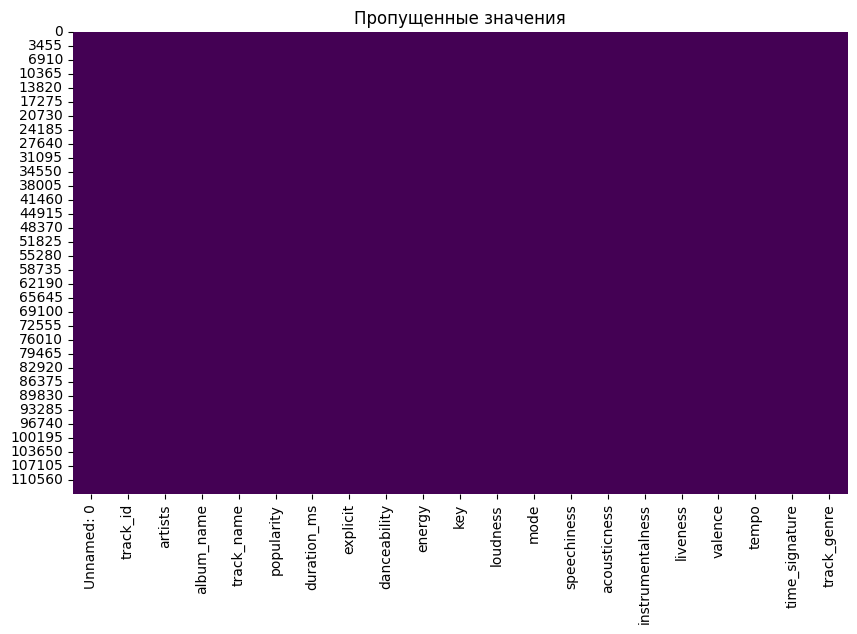

In [ ]:
# Проверка пропусков
missing_values = df.isnull().sum()
print("\nПропущенные значения в данных:\n", missing_values)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Пропущенные значения")
plt.show()

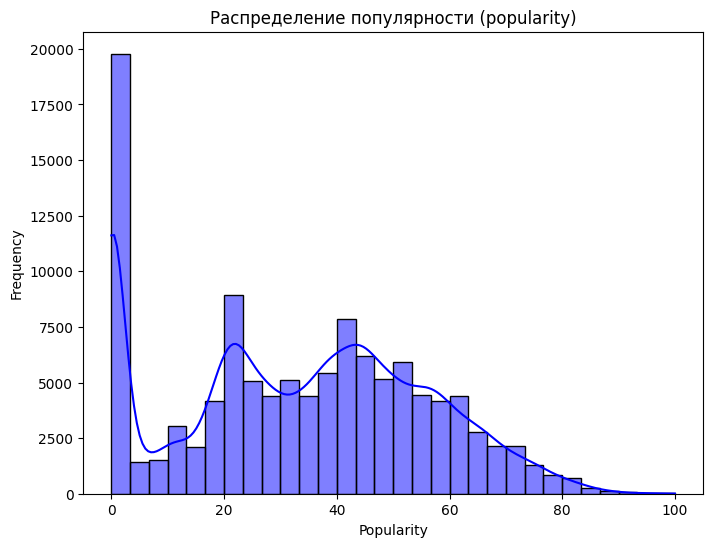

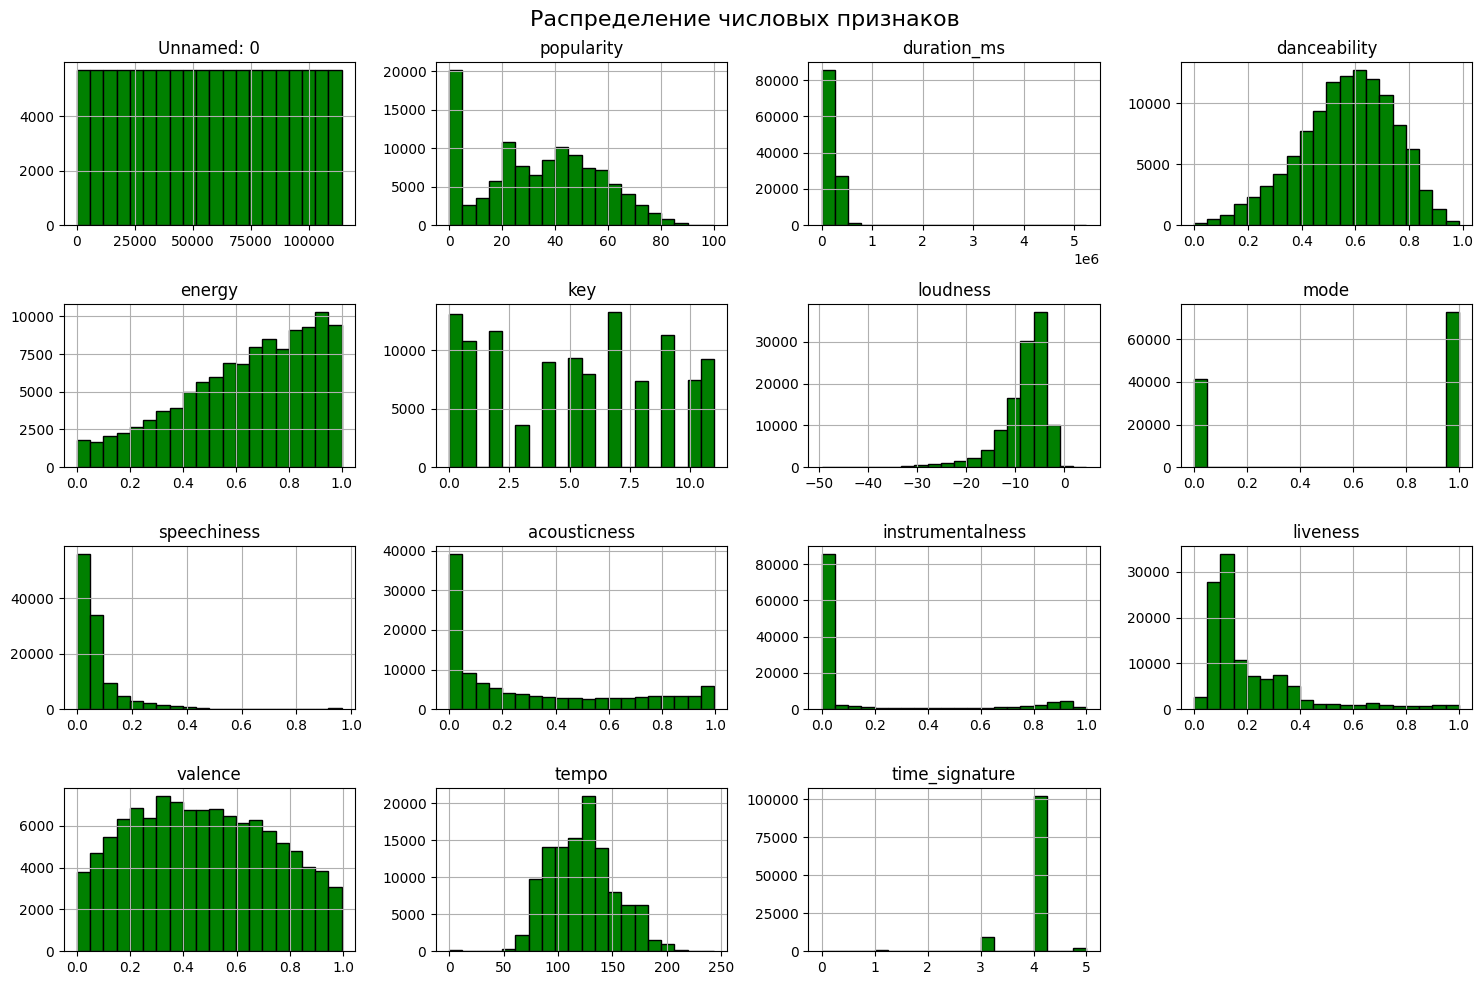

In [ ]:
# Распределение таргета (popularity)
plt.figure(figsize=(8, 6))
sns.histplot(df['popularity'], bins=30, kde=True, color='blue')
plt.title("Распределение популярности (popularity)")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

# Распределение других числовых признаков
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_columns].hist(figsize=(15, 10), bins=20, color='green', edgecolor='black')
plt.suptitle("Распределение числовых признаков", fontsize=16)
plt.tight_layout()
plt.show()

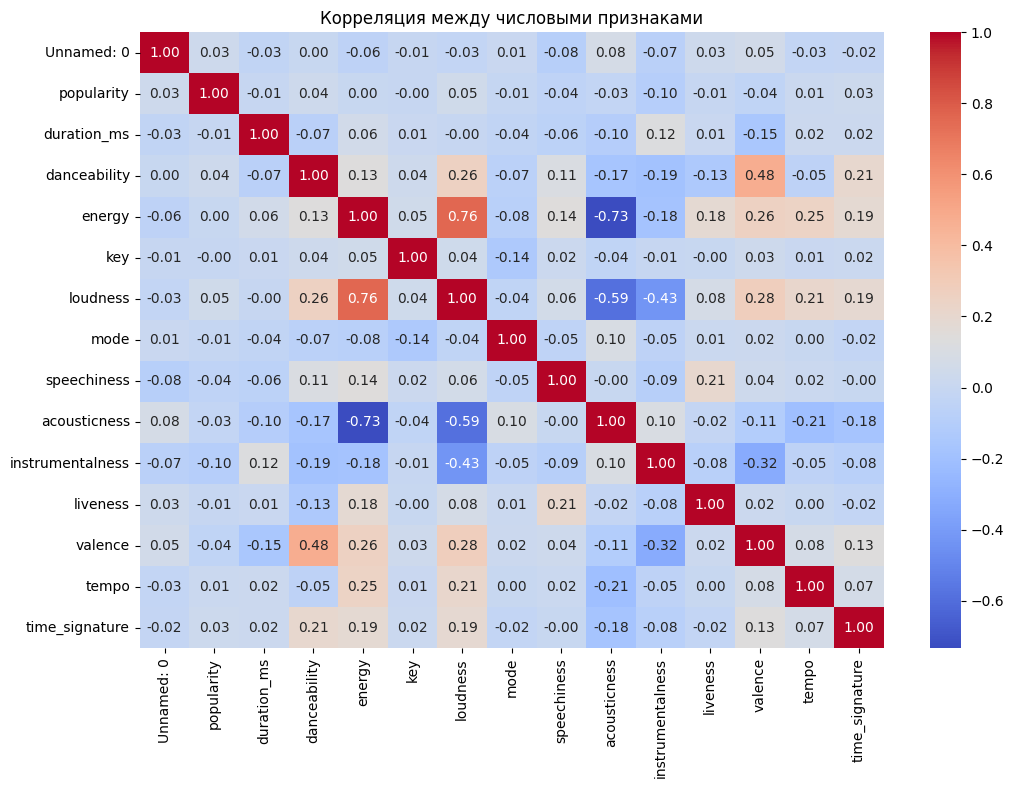


Корреляция признаков с таргетом (popularity):
 popularity          1.000000
loudness            0.050423
danceability        0.035448
Unnamed: 0          0.032142
time_signature      0.031073
tempo               0.013205
energy              0.001056
key                -0.003853
liveness           -0.005387
duration_ms        -0.007101
mode               -0.013931
acousticness       -0.025472
valence            -0.040534
speechiness        -0.044927
instrumentalness   -0.095139
Name: popularity, dtype: float64


In [ ]:
# Выбор только числовых признаков
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Корреляционная матрица
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Корреляция между числовыми признаками")
plt.show()

# Отдельный анализ корреляции с таргетом (popularity)
if 'popularity' in numeric_df.columns:
    target_corr = correlation_matrix['popularity'].sort_values(ascending=False)
    print("\nКорреляция признаков с таргетом (popularity):\n", target_corr)
else:
    print("Таргет (popularity) отсутствует в числовых колонках!")


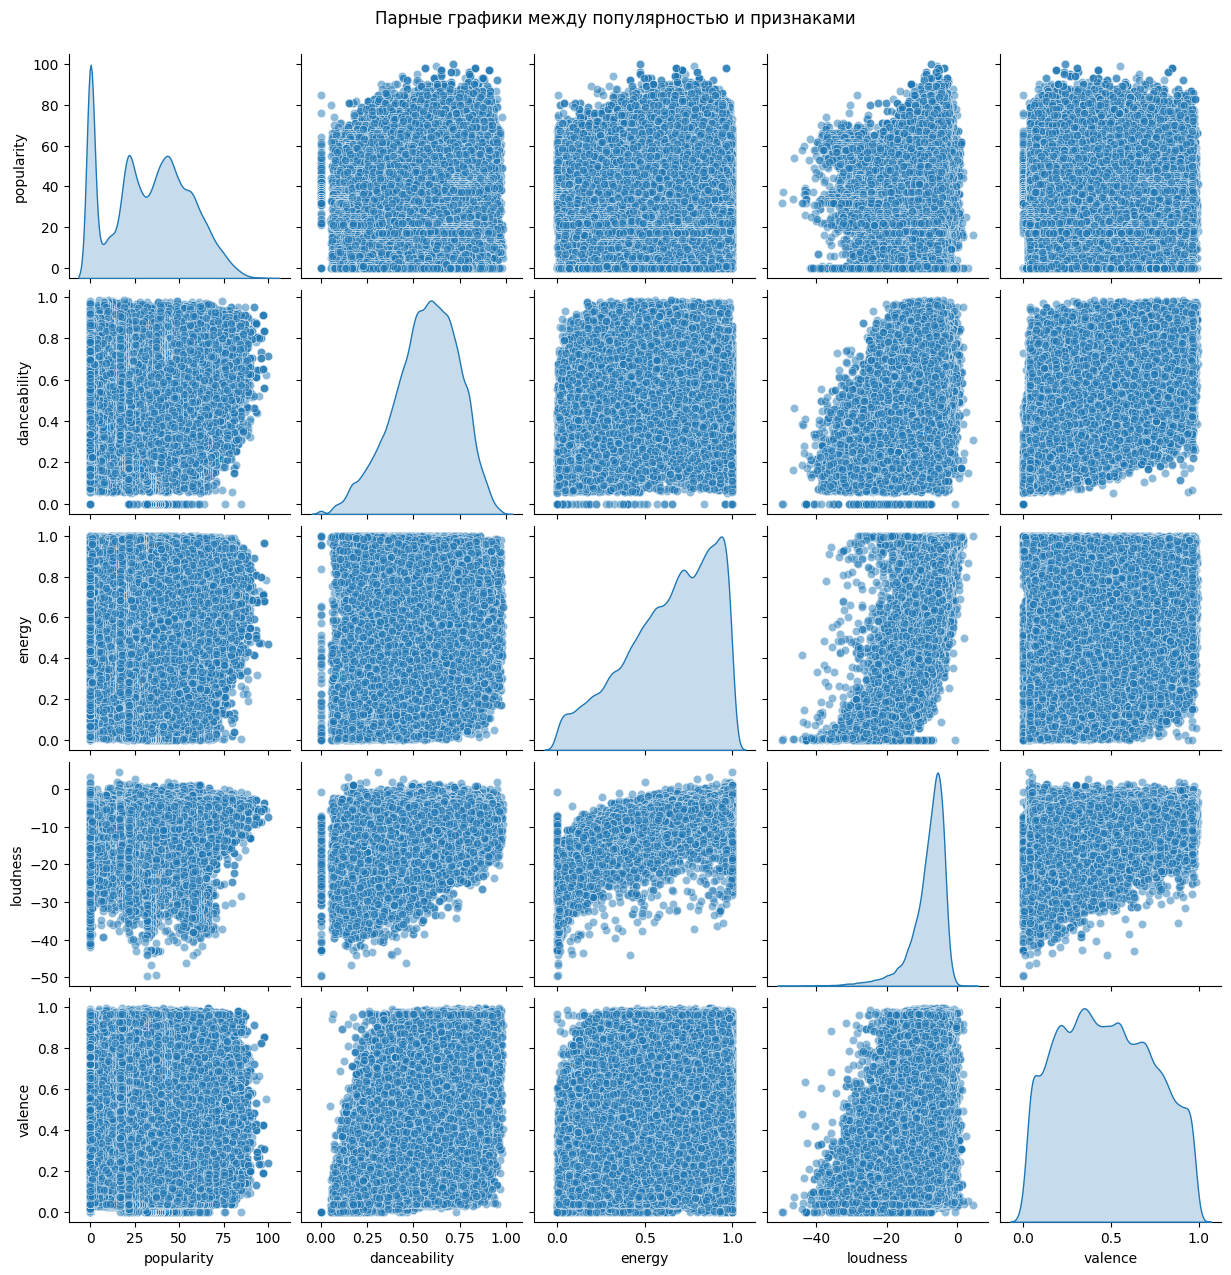

In [ ]:
# Выбор признаков для анализа
selected_features = ['popularity', 'danceability', 'energy', 'loudness', 'valence']

# Парные графики
sns.pairplot(df[selected_features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Парные графики между популярностью и признаками", y=1.02)
plt.show()

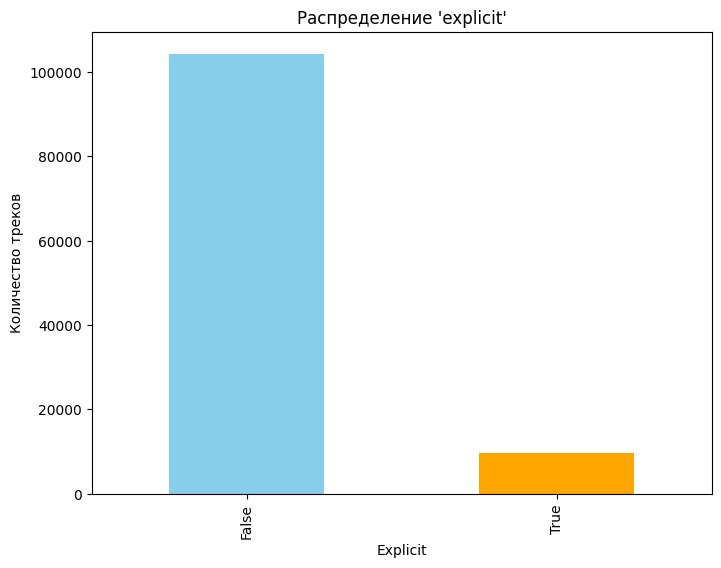

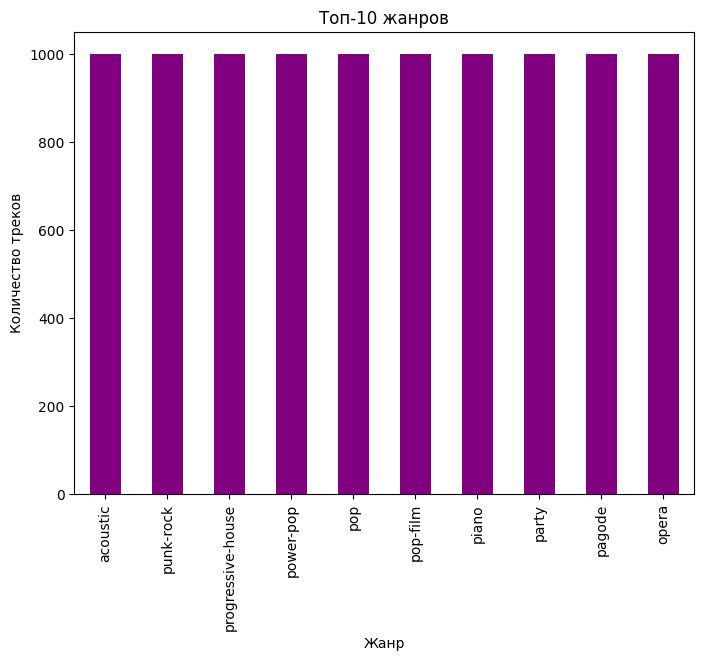

In [ ]:
# Распределение 'explicit'
explicit_counts = df['explicit'].value_counts()
explicit_counts.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 6))
plt.title("Распределение 'explicit'")
plt.xlabel("Explicit")
plt.ylabel("Количество треков")
plt.show()

# Топ-10 жанров (если доступен track_genre)
if 'track_genre' in df.columns:
    genre_counts = df['track_genre'].value_counts().head(10)
    genre_counts.plot(kind='bar', color='purple', figsize=(8, 6))
    plt.title("Топ-10 жанров")
    plt.xlabel("Жанр")
    plt.ylabel("Количество треков")
    plt.show()

In [ ]:
# Добавление новых признаков
df['duration_min'] = df['duration_ms'] / 60000  # Длина трека в минутах
df['intensity'] = df['energy'] * df['danceability']  # Интенсивность трека
df['normalized_loudness'] = -df['loudness']  # Нормализация громкости (положительные значения)
df['explicit_binary'] = df['explicit'].astype(int)  # Преобразование explicit в бинарный вид (0 и 1)

# Вывод примеров данных
print("\nНовые признаки:\n", df[['duration_min', 'intensity', 'normalized_loudness', 'explicit_binary']].head())


Новые признаки:
    duration_min  intensity  normalized_loudness  explicit_binary
0      3.844433   0.311636                6.746                0
1      2.493500   0.069720               17.235                0
2      3.513767   0.157242                9.734                0
3      3.365550   0.015854               18.515                0
4      3.314217   0.273774                9.681                0


In [ ]:
# Выбор новых признаков
new_features = ['duration_min', 'intensity', 'normalized_loudness', 'explicit_binary']

# Корреляция новых признаков с таргетом
correlation_with_target = df[new_features + ['popularity']].corr()['popularity'].sort_values(ascending=False)
print("\nКорреляция новых признаков с популярностью:\n", correlation_with_target)


Корреляция новых признаков с популярностью:
 popularity             1.000000
explicit_binary        0.044082
intensity              0.006060
duration_min          -0.007101
normalized_loudness   -0.050423
Name: popularity, dtype: float64


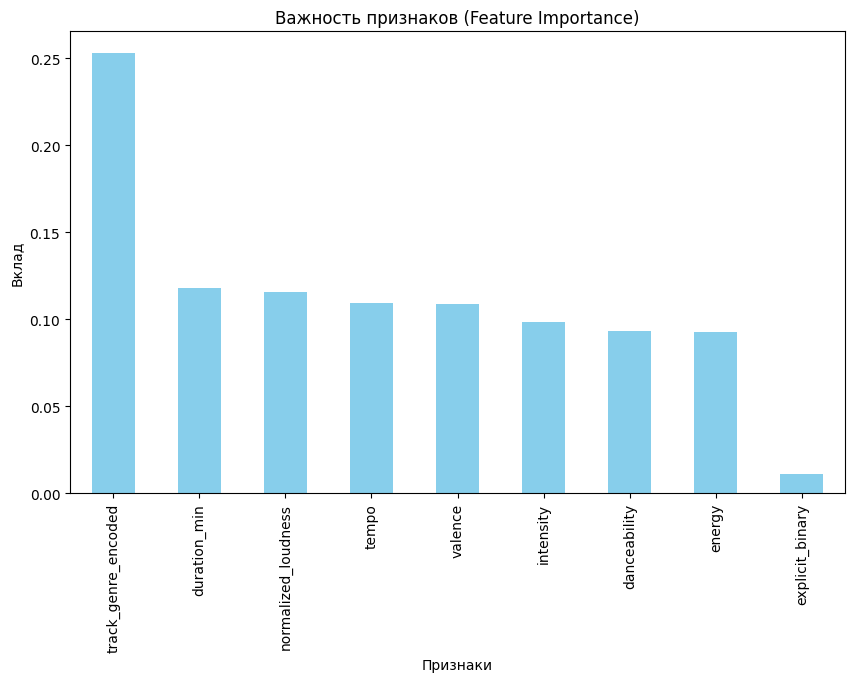

In [ ]:
# Преобразование категориальных признаков
if 'track_genre' in df.columns:
    label_encoder = LabelEncoder()
    df['track_genre_encoded'] = label_encoder.fit_transform(df['track_genre'])

# Выбор признаков
features = ['duration_min', 'intensity', 'normalized_loudness', 'explicit_binary', 'danceability',
            'energy', 'valence', 'tempo']

if 'track_genre_encoded' in df.columns:
    features.append('track_genre_encoded')

X = df[features]
y = df['popularity']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Оценка важности признаков
feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Важность признаков (Feature Importance)")
plt.ylabel("Вклад")
plt.xlabel("Признаки")
plt.show()

In [ ]:
# Предсказания
y_pred = rf.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print("\nКачество модели:")
print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R^2):", r2)


Качество модели:
Среднеквадратичная ошибка (MSE): 253.84165991086235
Коэффициент детерминации (R^2): 0.48560994460456886


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Разделение признаков и таргета
X = df.drop(columns=['popularity', 'track_id', 'track_name', 'artists', 'album_name', 'track_genre'])
y = df['popularity']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование числовых данных
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

# Кодирование категориальных данных
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns
encoder = OneHotEncoder(handle_unknown='ignore')

# Применение трансформера
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_features),
        ('cat', encoder, categorical_features)
    ]
)

# Преобразование данных
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Линейная модель
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_score = mean_squared_error(y_test, ridge_pred, squared=False)
print(f"RMSE Ridge: {ridge_score:.2f}")

# Дерево решений
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_score = mean_squared_error(y_test, tree_pred, squared=False)
print(f"RMSE DecisionTree: {tree_score:.2f}")

# Градиентный бустинг
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_score = mean_squared_error(y_test, xgb_pred, squared=False)
print(f"RMSE XGBoost: {xgb_score:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE Ridge: 21.91


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE DecisionTree: 21.01
RMSE XGBoost: 16.56


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Модель нейронной сети
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Оценка нейронной сети
nn_pred = model.predict(X_test).flatten()
nn_score = mean_squared_error(y_test, nn_pred, squared=False)
print(f"RMSE Neural Network: {nn_score:.2f}")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Модель нейронной сети
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Оценка нейронной сети
nn_pred = model.predict(X_test).flatten()
nn_score = mean_squared_error(y_test, nn_pred, squared=False)
print(f"RMSE Neural Network: {nn_score:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 639.9152 - mse: 639.9152 - val_loss: 476.6898 - val_mse: 476.6898
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 472.2767 - mse: 472.2767 - val_loss: 466.2402 - val_mse: 466.2402
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 461.1359 - mse: 461.1359 - val_loss: 458.3761 - val_mse: 458.3761
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 455.1331 - mse: 455.1331 - val_loss: 454.5797 - val_mse: 454.5797
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 451.7998 - mse: 451.7998 - val_loss: 455.9266 - val_mse: 455.9266
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 448.9771 - mse: 448.9771 - val_loss: 451.8376 - val_mse: 451.8376
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 443.5143 - mse: 443.5143 - val_loss: 450.5273 - val_mse: 450.5273
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 445.6877 - mse: 445.6877 - val_loss: 448.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 669.5786 - mse: 669.5786 - val_loss: 473.2259 - val_mse: 473.2259
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 465.9878 - mse: 465.9878 - val_loss: 461.0676 - val_mse: 461.0676
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 458.5149 - mse: 458.5149 - val_loss: 456.1373 - val_mse: 456.1373
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 452.0834 - mse: 452.0834 - val_loss: 453.4627 - val_mse: 453.4627
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 444.9855 - mse: 444.9855 - val_loss: 450.3253 - val_mse: 450.3253
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 445.8258 - mse: 445.8258 - val_loss: 448.9139 - val_mse: 448.9139
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 445.6363 - mse: 445.6363 - val_loss: 451.4007 - val_mse: 451.4007
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 442.7112 - mse: 442.7112 - val_loss: 446.3062 - val

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import KFold

best_model = XGBRegressor()  # Использование лучшей модели
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
cv_scores = -cv_scores  # RMSE из отрицательных значений
print(f"Средний RMSE после кросс-валидации: {cv_scores.mean():.2f}")


Средний RMSE после кросс-валидации: 16.74
